In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn import metrics
import pickle
import os
import sys
df = pd.read_csv(".\\data.csv")
p1=df['PriceUSD'].value_counts()
df.drop(['Phone'] , inplace=True,axis=1)


In [2]:
grouped_df=pd.DataFrame(df.groupby('PriceUSD').aggregate(np.mean))
grouped_df.insert(0,"Counts",p1,True)
grouped_df.head()

,Counts,Ayeneie_21,Ayeneie_22,Ayeneie_23,Ayeneie_31,Ayeneie_32,Ayeneie_33,Tarazuie,Pleie21,Pleie22,...,RaghamDovom0,RaghamDovom1,RaghamDovom2,RaghamDovom3,RaghamDovom4,RaghamDovom5,RaghamDovom6,RaghamDovom7,RaghamDovom8,RaghamDovom9
PriceUSD,,,,,,,,,,,,,,,,,,,,,
173.33,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.0,0.0,0.500000,0.000000,0.00,0.000000,0.000000,0.500000
176.67,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.133333,0.0,...,0.0,0.00,0.0,0.0,0.266667,0.133333,0.40,0.000000,0.066667,0.133333
178.33,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.0,0.0,0.000000,0.333333,0.00,0.666667,0.000000,0.000000
180.00,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.05,0.0,0.0,0.100000,0.450000,0.15,0.100000,0.150000,0.000000
181.67,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.0,0.0,0.000000,0.000000,0.50,0.500000,0.000000,0.000000


In [3]:
cols = grouped_df.columns.values.tolist()
X_cols = cols[1:]
X = grouped_df[X_cols]
y=grouped_df.index
y_log = np.log(y)


In [4]:
sc = StandardScaler()

scaler = sc.fit(X)
X_scaled  = scaler.transform(X)
#testX_scaled  = scaler.transform(X)

mlp_reg = MLPRegressor(hidden_layer_sizes=(64,32,128,32,64),
                       max_iter = 1000,activation = 'relu',# 'relu',
                       solver = 'adam')
mlp_reg.fit(X, y_log)


MLPRegressor(hidden_layer_sizes=(64, 32, 128, 32, 64), max_iter=1000)

In [5]:
sample_weight = grouped_df['Counts'].to_numpy()

print('R^2=' , mlp_reg.score(X, y_log, sample_weight = sample_weight))


R^2= 0.9911192550163682


In [6]:
y_pred = mlp_reg.predict(X)
df_temp = pd.DataFrame({'Actual': y_log, 'Predicted': y_pred})
df_temp.head()

,Actual,Predicted
0,5.155197,5.346905
1,5.174284,5.259232
2,5.183636,5.267707
3,5.192957,5.331267
4,5.202192,5.375187


In [7]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_log, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_log, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_log, y_pred)))

Mean Absolute Error: 0.0797686328185232
Mean Squared Error: 0.015169357882966679
Root Mean Squared Error: 0.12316394717191666


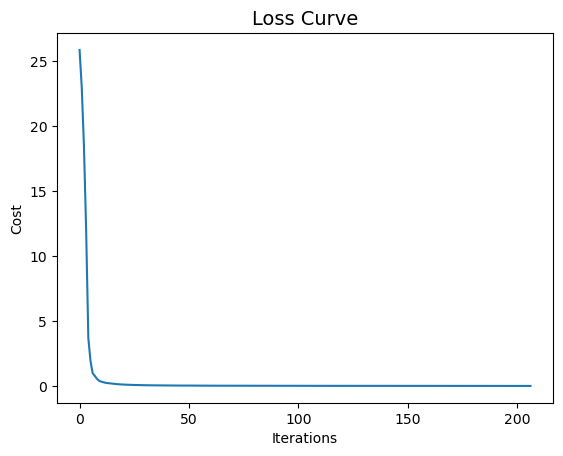

In [8]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

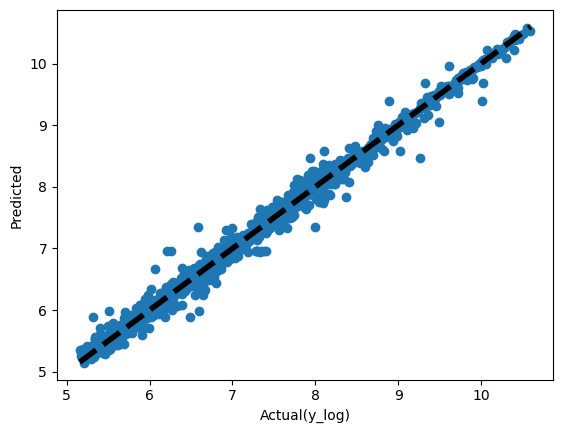

In [9]:
from sklearn.linear_model import LinearRegression
fig, ax = plt.subplots()
plt.scatter(y_log, y_pred)
ax.plot([y_log.min(), y_log.max()], [y_log.min(), y_log.max()], 'k--', lw=4)
ax.set_xlabel('Actual(y_log)')
ax.set_ylabel('Predicted')
#regression line
y2=y_log.values
y_test, y_predicted = y2.reshape((-1,1)), y_pred.reshape((-1,1))
#ax.plot(y_test, LinearRegression().fit(y_test, y_predicted).predict(y_test))
plt.annotate("r-squared = {:.3f}".format(r2_score(y_log, y_pred)), (0, 1))
plt.show()

In [10]:
# save the model to disk
filename = 'phoneNumberPredict_model.sav'
pickle.dump(mlp_reg, open(filename, 'wb'))

In [11]:
n=['09121096396','09121097954','09121421870','09121613442','09121830068',
'09121832349','09121901644','09122027496','09122027683','09121197956',
'09121137084','09121160917','09125863009','09123879050','09123888653',
'09121166541','09122064378','09122069135','09122080307','09122096585',
'09128821650','09128854151','09126791419','09126799699','09126818146',
'09128920262','09128927092','09128946033','09127096095','09127121514',
'09127129372','09127145956','09127148287','09127163438','09127183431',
'09127232018','09127343898','09127380638','09127400258','09127535382']
p=[181500000,151000000,112000000,110000000,
162000000,89000000,104000000,74000000,74000000,147000000,
180000000,392000000,37500000,51500000,44000000,174000000,
56000000,56000000,117000000,70000000,19000000,17000000,
24000000,40300000,29900000,20200000,21400000,16900000,
20600000,28000000,18000000,21700000,21700000,21700000,
21700000,24000000,21000000,34000000,30000000,28000000]
p=[i*0.044 for i in p]
p=pd.Series(p)



In [12]:
module_path = os.path.abspath(os.path.join('.\\FeatureConstructor '))
if module_path not in sys.path:
    sys.path.append(module_path)

import FeatureConstructor as pn
pre=[]
for i in n:
    h= pn.predictPrice(i)
    pre.append(float(h[1]))

pre=pd.Series(pre)

c:\Users\Mojtaba-BSF\miniconda3\envs\bsf-env\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
c:\Users\Mojtaba-BSF\miniconda3\envs\bsf-env\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
c:\Users\Mojtaba-BSF\miniconda3\envs\bsf-env\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
c:\Users\Mojtaba-BSF\miniconda3\envs\bsf-env\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
c:\Users\Mojtaba-BSF\miniconda3\envs\bsf-env\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
c:\Users\M

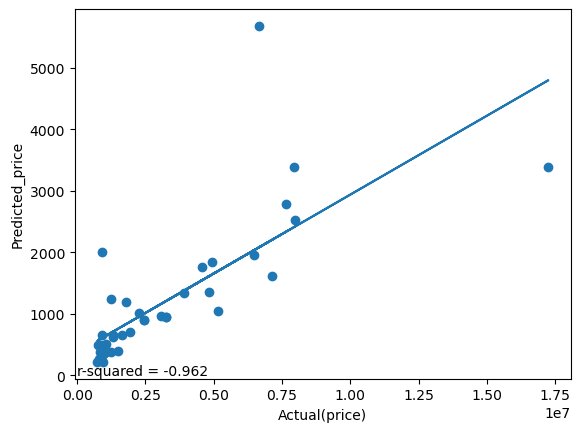

Correlation: 0.8234078527146347


In [13]:
fig, ax = plt.subplots()
ax.set_xlabel('Actual(price)')
ax.set_ylabel('Predicted_price')
plt.scatter(p,pre)
Actual, Predicted_price = p.values.reshape((-1,1)),pre.values.reshape((-1,1))
ax.plot(Actual, LinearRegression().fit(Actual, Predicted_price).predict(Actual))
plt.annotate("r-squared = {:.3f}".format(r2_score(Actual, Predicted_price)), (0, 1))
plt.show()
print('Correlation:',p.corr(pre,method='spearman'))